<a href="https://colab.research.google.com/github/kyungmo90/Ubion-Python/blob/main/%EC%9A%94%EC%96%91%EC%8B%9C%EC%84%A4_%EA%B0%84%EC%9D%98_%EC%88%98%EC%9D%98_%EA%B4%80%EA%B3%84%EC%97%90_%EB%94%B0%EB%A5%B8_%EC%8B%9C%EC%84%A4_%EC%88%98_%EC%98%88%EC%B8%A1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 요양시설 간의 수의 관계에 따른 시설 수 예측



구글 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#구글 드라이브 마운트

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


판다스 함수 호출 및 데이터 로드, 한글 인코딩

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/2022년_9월_시군구별_장기요양기관_현황.CSV", encoding = "cp949")
df

# 판다스 불러오고 csv파일을 한글 인코딩하고 df에 입력력

,시도,노인요양시설,공동생활가정,방문요양,방문목욕,주야간보호,복지용구
0,서울특별시,5,3.0,92,71.0,17.0,18.0
1,서울특별시,9,13.0,111,102.0,19.0,20.0
2,서울특별시,8,23.0,96,81.0,22.0,9.0
3,서울특별시,20,14.0,185,144.0,31.0,30.0
4,서울특별시,10,19.0,120,103.0,26.0,13.0
...,...,...,...,...,...,...,...
245,경상남도,10,4.0,54,33.0,9.0,4.0
246,경상남도,9,NaN,25,19.0,12.0,NaN
247,경상남도,6,NaN,23,13.0,7.0,4.0
248,제주특별자치도,19,2.0,24,19.0,20.0,4.0


In [ ]:
df.info()

# df 정보 불러오기기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      250 non-null    object 
 1   노인요양시설  250 non-null    int64  
 2   공동생활가정  221 non-null    float64
 3   방문요양    250 non-null    int64  
 4   방문목욕    248 non-null    float64
 5   주야간보호   248 non-null    float64
 6   복지용구    239 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 13.8+ KB


In [ ]:
df.isnull().sum()

# df null값 확인

시도         0
노인요양시설     0
공동생활가정    29
방문요양       0
방문목욕       2
주야간보호      2
복지용구      11
dtype: int64

In [ ]:
df.fillna(0, inplace = True)

# df null값 삭제

In [ ]:
df.isnull().sum()

# df null값 삭제됐는지 확인

시도        0
노인요양시설    0
공동생활가정    0
방문요양      0
방문목욕      0
주야간보호     0
복지용구      0
dtype: int64

In [ ]:
df.describe()

# df 기술통계

,노인요양시설,공동생활가정,방문요양,방문목욕,주야간보호,복지용구
count,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,17.248000,7.172000,66.61600,46.684000,20.052000,7.892000
std,18.427174,8.699722,47.32631,36.347499,15.023185,6.740778
min,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000
25%,6.000000,1.250000,29.00000,19.000000,9.000000,2.250000
50%,11.500000,4.000000,55.50000,35.000000,17.000000,6.000000
75%,21.000000,9.000000,92.00000,66.750000,27.750000,12.000000
max,129.000000,55.000000,236.00000,199.000000,88.000000,38.000000


박스플롯으로 이상치 확인(40위로 짜를 예정)

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5996b587f0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f5996b44490>, <matplotlib.lines.Line2D object at 0x7f5996b447f0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5996b44b50>, <matplotlib.lines.Line2D object at 0x7f5996b44eb0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5996b44130>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5996ad1250>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5996ad1550>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_

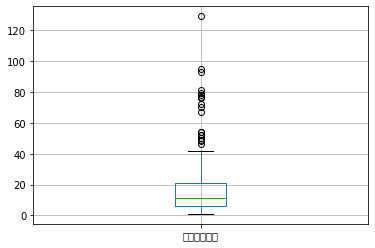

In [ ]:
df.boxplot(column="노인요양시설", return_type="both")
#boxplot: 최솟값,Q1(lower), Q2(중앙값), Q3(upper), 최댓값
#통계를 낼 때 평균이나 표준편차를 많이 사용하는데 데이터에 이상치가 있으면 왜곡된 의미 전달 가능성 높음
#이상치가 있는지 확인하기 위해 박스플롯을 활용하여 이상치가 얼마나 포함되어 있는지 판단

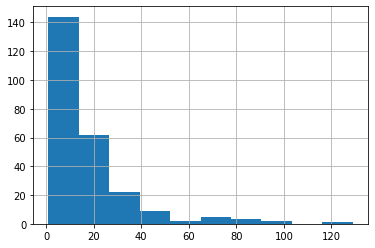

In [ ]:
df["노인요양시설"].hist() #hist는 막대그래프

IQR 배운거 그대로 사용했습니다.

In [ ]:
q1 = df["노인요양시설"].quantile(q=0.25)
q3 = df["노인요양시설"].quantile(q=0.75)
IQR = q3-q1 #Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이
IQR #Interquartile range(사분위간 범위)

15.0

In [ ]:
data_IQR = df[(df["노인요양시설"] < q3 + IQR * 1.5) & (df["노인요양시설"] > q1 - IQR * 1.5)] #1.5는 약속
data_IQR

,시도,노인요양시설,공동생활가정,방문요양,방문목욕,주야간보호,복지용구
0,서울특별시,5,3.0,92,71.0,17.0,18.0
1,서울특별시,9,13.0,111,102.0,19.0,20.0
2,서울특별시,8,23.0,96,81.0,22.0,9.0
3,서울특별시,20,14.0,185,144.0,31.0,30.0
4,서울특별시,10,19.0,120,103.0,26.0,13.0
...,...,...,...,...,...,...,...
245,경상남도,10,4.0,54,33.0,9.0,4.0
246,경상남도,9,0.0,25,19.0,12.0,0.0
247,경상남도,6,0.0,23,13.0,7.0,4.0
248,제주특별자치도,19,2.0,24,19.0,20.0,4.0


In [ ]:
!sudo apt-get install -y fonts-nanum #폰트 다운로드 리눅스 명령어
!sudo fc-cache -f -vv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

이상치 제거한 그래프를 이전 그래프와 비교

In [ ]:

import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic') #폰트 지정

In [ ]:
import seaborn as sns

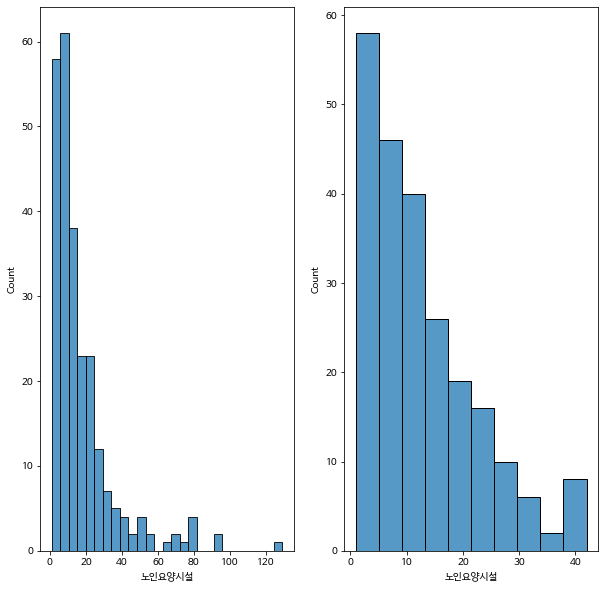

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,10))
sns.histplot(df["노인요양시설"], ax=ax[0])
sns.histplot(data_IQR["노인요양시설"], ax=ax[1])

In [ ]:

from matplotlib import pyplot as plt
#matplotlib: 정적, 애니메이션 및 대화형 시각화를 생성하기 위한 포괄적인 라이브러리
#pyplot:matplotlib가 MATLAB처럼 작동하도록 하는 함수 모음
from pandas import DataFrame
#pandas:오픈 소스 데이터 분석 및 조작 도구
#DataFrame:행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있으며 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구
import numpy as np
#numpy:행렬/배열 처리 및 연산
from pandas import *
     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# 트레인셋 나누는 것과 칼럼트랜스포머, 스케일러 모듈 불러오기

In [ ]:
df.columns

# 칼럼 확인해보기

Index(['시도', '노인요양시설', '공동생활가정', '방문요양', '방문목욕', '주야간보호', '복지용구'], dtype='object')

# 인공신경망

In [ ]:
import numpy as np

#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = df['노인요양시설']

#2. train = test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
#4. 모델링
from sklearn.neural_network import MLPRegressor

#4-1. 모델 생성
nn_reg_model = MLPRegressor(random_state=0, alpha=1, max_iter=1000, hidden_layer_sizes=[50, 50])
                            
#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value: \n", Y_pred)
print("trian accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:3f}".format(rmse)) 

Y predict value: 
 [11.05293582  2.05857952  2.55038899 10.96007832 12.56363145 30.9769583
  3.81723982 13.89486604  2.00919218 15.33229728  1.33640401 17.00591281
 13.07725388  7.73360097 60.42769807  8.91677602 26.13985773 10.05946328
 25.02297741 12.99819609 15.95750522 70.3983231  13.59338917 11.62124593
 11.22751602  6.59245473 38.24964114 28.19127016  5.93264605  8.88154461
  4.65922535 41.69660593 46.33780754 38.04407498 22.0175843   4.50160792
  2.37032144 10.38409346  4.84061531  1.43685192  3.13613345  2.53618961
 24.99328335 20.49790453 13.06644658 26.16041961  5.69549199 28.84536463
 25.57697477  4.99804628 13.80886709 28.54507006  6.83254416 12.85146897
  9.54197241 37.40286319  9.97704772 22.23505636  8.91252759 13.1616445
  8.6352488  12.44315509 12.24209271  9.88396079 14.65445023  7.01988252
  7.56979776 42.29271426 32.25565876 10.79219201  5.37277389  9.77819124
  9.99219461 21.45254052 34.59076246]
trian accuracy : 0.848
RMSE : 14.115676


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


*predict값과 train 정확도 RMSE값 어느정도 잘 나온것 확인*

딥러닝

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 딥러닝 할 때 경고문이 잘 떠서 무시하는 모듈 소환

DNN(Deep learning : Deep Neural Network)

회귀예측

In [ ]:
df.info()

# 예의상 정보 확인인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      250 non-null    object 
 1   노인요양시설  250 non-null    int64  
 2   공동생활가정  250 non-null    float64
 3   방문요양    250 non-null    int64  
 4   방문목욕    250 non-null    float64
 5   주야간보호   250 non-null    float64
 6   복지용구    250 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 13.8+ KB


In [ ]:
import keras
import tensorflow as tf

#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

In [ ]:
#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#4. seed 값 설정
np.random.seed(0)
tf.random.set_seed(0)

#5. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=5, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))

#6. 모형 학습
model.compile(loss = "mse", optimizer = "SGD") # 확률적 경사 하강법(SGD): 
Y_pred = np.round(model.predict(X_test[:5], verbose=0), 3)
print("Y predict value \n", Y_pred)

#7. 모형 평가
train_score = model.evaluate(X_train, Y_train,verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("train mse: {:.3f}".format(train_score))
print("test mse: {:.3f}".format(test_score))

Y predict value 
 [[0.    0.023 0.    0.    0.    0.223 0.    0.    0.    0.    0.    0.
  0.    0.    0.119 0.04  0.001 0.    0.019 0.    0.103 0.    0.236 0.141
  0.    0.    0.    0.01  0.    0.    0.077 0.061 0.016 0.068 0.    0.015
  0.112 0.    0.    0.    0.022 0.045 0.    0.    0.    0.    0.    0.
  0.12  0.108 0.035 0.206 0.    0.    0.038 0.    0.    0.    0.    0.011
  0.085 0.    0.01  0.026]
 [0.    0.    0.092 0.083 0.    0.    0.149 0.    0.202 0.    0.098 0.224
  0.015 0.    0.382 0.035 0.044 0.165 0.149 0.    0.    0.    0.488 0.134
  0.    0.    0.    0.    0.    0.    0.31  0.    0.    0.09  0.    0.
  0.    0.    0.    0.26  0.045 0.    0.    0.    0.    0.    0.065 0.045
  0.    0.231 0.004 0.    0.    0.432 0.033 0.    0.284 0.438 0.    0.669
  0.    0.    0.345 0.   ]
 [0.    0.    0.005 0.077 0.    0.    0.001 0.    0.035 0.    0.    0.125
  0.003 0.02  0.162 0.111 0.    0.    0.052 0.018 0.009 0.    0.167 0.068
  0.    0.    0.    0.045 0.    0.    0.096 0.   

train mse와 test mse 확인

In [ ]:
# Predict on the test data
predictions = model.predict(test_data)

# Calculate the MSE
mse = np.mean((predictions - test_labels)**2)

# Plot the MSE over the number of epochs
plt.plot(range(len(epochs)), mse, label='MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

NameError: ignored

# 앙상블

회귀예측

In [ ]:
#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#4. 단일 모형 생성
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

svr = SVR()
mlp = MLPRegressor(random_state=0)

#5. voting model 생성
model = VotingRegressor(estimators = [("SVR", svr), ("MLP", mlp)])

#6. 모형학습
model.fit(X_train, Y_train)

#7. 예측 및 모형 성능 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
#8-1. 보팅모형 정확도
print("voting regressor accuracy(R2) : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별모형 정확도
Regressors = [svr, mlp]
for Regressor in Regressors :
  Regressor.fit(X_train, Y_train)
  Regressor.fit(X_train, Y_train)
  class_name = Regressor.__class__.__name__
  print("{0} accuracy : {1:3f}".format(class_name, Regressor.score(X_test, Y_test)))

정확도가 전반적으로 잘 안나오고 MLP accuracy는 완전 이상합니다.

# 랜덤포레스트

회귀예측

In [ ]:
#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#4. 모형 생성
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 4)

#5. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n",Y_pred)
print("accuracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

회귀모델 예측 정확도를 나타내는 R2 accuracy와 실제값과 예측값 사이의 오차를 나타내는 RMSE 모두 만족할만한 수치가 나왔습니다.

# 그래디언트 회귀예측

In [ ]:
#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#4. 모형생성
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, max_depth = 4, learning_rate = 0.1)

#5. 모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

test 정확도와 RMSE모두 만족할만한 수치로 나왔습니다.